<a href="https://colab.research.google.com/github/sreekar-pasumarthi/Deep-Learning-Projects/blob/master/wine_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense

In [4]:
df_train=pd.read_csv('https://raw.githubusercontent.com/sreekar-pasumarthi/Deep-Learning-Projects/master/wine/wineQualityWhites.csv')
print(f'The train set contain {df_train.shape[0]} examples')
print(f'The train set contain {df_train.shape[1]} features')

The train set contain 4898 examples
The train set contain 12 features


In [0]:
df_train.head()
X_train = df_train.drop('quality', axis = 1)
y_train = df_train['quality']

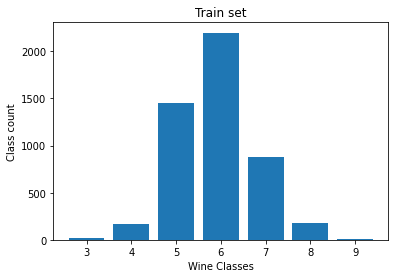

In [6]:
whitewine_classes= y_train.unique()
values = y_train.value_counts()#occurrence of each class

plt.bar(whitewine_classes, values)
plt.title('Train set')
plt.xlabel('Wine Classes')
plt.ylabel('Class count')
plt.show() 

In [0]:
X_train.describe()
#we need to normalise data

In [8]:
X_train = df_train.values #to convert it to array and then normalise
X_train = normalize(X_train)#rescaling the data between 0 and 1
print(X_train[0])

[3.94240529e-02 1.52064204e-03 2.02752272e-03 1.16582557e-01
 2.53440340e-04 2.53440340e-01 9.57441285e-01 5.63763957e-03
 1.68960227e-02 2.53440340e-03 4.95616665e-02 3.37920454e-02]


In [9]:
y_train = to_categorical(y_train)#to convert y_train into to 'one hot vector'
y_train.shape

(4898, 10)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)#Split arrays or matrices into random train and test subsets
#test_size represents the proportion of the dataset to include in the test split.->20% to test split from training data
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5)


In [86]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Dense(150, input_shape=(12,), activation='relu'),
 tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 150)               1950      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1510      
Total params: 3,460
Trainable params: 3,460
Non-trainable params: 0
_________________________________________________________________


In [87]:
history = model.fit(X_train, y_train,epochs=200,validation_data=(X_val, y_val),verbose=0)
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))
_, accuracy = model.evaluate(X_val, y_val)
print('Accuracy: %.2f' % (accuracy*100))

98/98 [==============================] - 0s 1ms/step - loss: 0.2875 - acc: 0.9378
Accuracy: 93.78
13/13 [==============================] - 0s 1ms/step - loss: 0.2821 - acc: 0.9490
Accuracy: 94.90


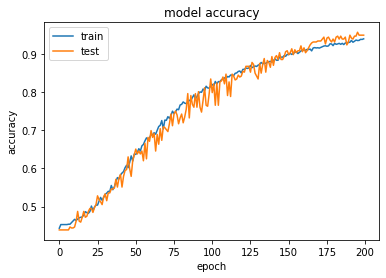

In [88]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])#val_acc :accuracy on valid data
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [89]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

13/13 [==============================] - 0s 2ms/step - loss: 0.3023 - acc: 0.9490
Accuracy: 94.90
